In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

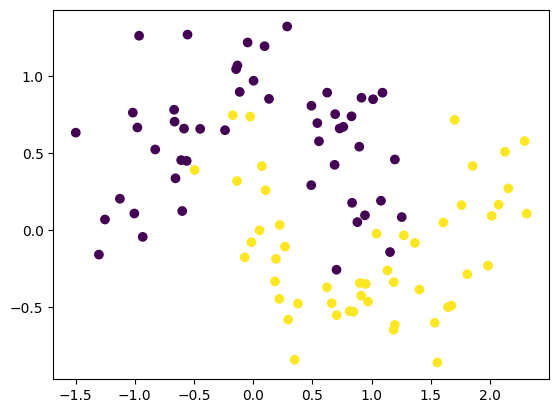

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [32]:
model=Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
history=model.fit(X,y,epochs=100,verbose=0)

In [35]:
model.get_weights()

[array([[-0.51481134, -1.5349283 , -0.02262813,  0.3308429 , -0.02308656,
         -0.44723764, -0.34431654,  0.49318138,  0.3899709 ,  0.4875374 ],
        [-0.29622656, -0.32956144, -0.39736363,  0.02944385,  0.49873558,
          0.04449371,  0.45901304, -0.35654372, -0.46669912, -0.32435134]],
       dtype=float32),
 array([ 0.17820477,  0.6779271 ,  0.0822808 , -0.17235161, -0.01714844,
         0.084721  ,  0.03335764, -0.08501247, -0.11627243, -0.18186009],
       dtype=float32),
 array([[-2.320645  ,  0.13308932, -0.19601263, -0.390563  ,  0.2755916 ,
         -0.07808255,  0.69231427,  0.20273758,  0.04483553, -0.20716657],
        [-1.8388511 , -0.33038077, -0.12361029, -0.08037753,  0.354371  ,
          0.551148  , -0.00917623, -0.6575311 , -0.428928  ,  0.75044185],
        [-0.52980775,  0.19092338,  0.16311692, -0.45271584, -0.6186532 ,
         -0.34475428, -0.12873417, -0.35113487,  0.0552474 , -0.2861602 ],
        [ 0.7095579 ,  0.21249703,  0.3469083 , -0.46872658, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

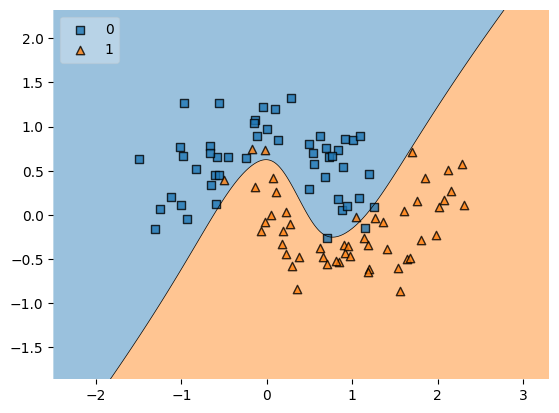

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)

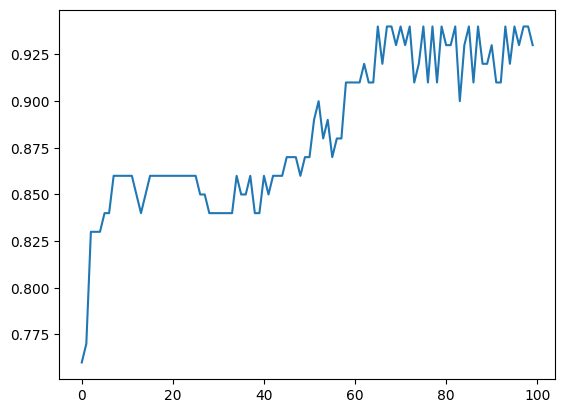

In [37]:
plt.plot(history.history['accuracy'])